# «به نام خدا»
## پردازش زبان طبیعی 
## تمرین کامپیوتری شماره یک
## Tokenization
### امیرحسین دبیری اقدم - 810197502
#####  دانشگاه تهران - اسفند 1400
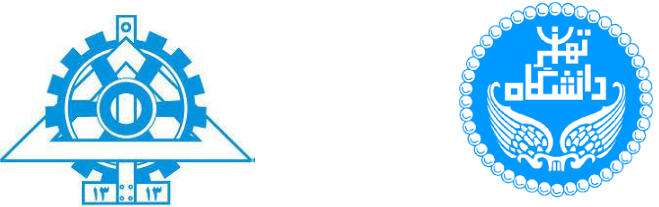
***

# **Step 1 - BPE from scratch**

In [1]:
import re # Regex

In [2]:
corpus = ['low', 'low', 'low', 'low', 'low', 'lower', 'lower', 'widest', 'widest', 'widest', 'newest', 'newest', 'newest', 'newest', 'newest']

In [3]:
def add_spaces_EOW(word):
    return ' ' + ' '.join([c for c in word]) + ' _ '

def init_dict(corpus):
    dictionary = {}
    for v in set(corpus):
        dictionary[v] = corpus.count(v)

    dictionary_new = {}
    for k, v in dictionary.items():
        k_new = add_spaces_EOW(k)
        dictionary_new[k_new] = dictionary[k]

    return dictionary_new

In [4]:
dictionary = init_dict(corpus)
print(dictionary)

{' l o w e r _ ': 2, ' w i d e s t _ ': 3, ' l o w _ ': 5, ' n e w e s t _ ': 5}


In [5]:
def init_vocab(dictionary):
    vocab = list(set(re.findall("[A-Za-z_]", " ".join(dictionary))))
    return vocab

In [6]:
vocab = init_vocab(dictionary)
print(vocab)

['e', 'l', '_', 'i', 's', 'n', 'w', 't', 'o', 'd', 'r']


In [7]:
def train_BPE(corpus, vocab_size):

    print('-' * 59 + ' i = 0 ' + '-' * 59)
    dictionary = init_dict(corpus)
    print('Dictionary', dictionary)

    vocab = init_vocab(dictionary)
    print('Vocab:', vocab)

    merged_pairs = list()
    i = 1
    while(len(vocab) <= vocab_size):
        most_freq_pair = None
        most_freq_pair_count = -1
        for s1 in vocab:
            for s2 in vocab:
                if (s1 != s2):
                    pair = ' ' + s1 + ' ' + s2 + ' '
                    count = 0
                    for k, v in dictionary.items():
                        if (re.search(pair, k)): count += v * len(re.findall(pair, k)) 

                    if (count >= most_freq_pair_count and count > 0): 
                        most_freq_pair_count = count
                        most_freq_pair = pair[1:-1]

        if(most_freq_pair): 
            vocab.append(''.join(most_freq_pair.split(' ')))
            merged_pairs.append((most_freq_pair.split(' ')))
            for k, v in dictionary.items():
                if (re.findall(most_freq_pair, k)): 
                    new_k = re.sub(most_freq_pair, ''.join(most_freq_pair.split(' ')), k)
                    dictionary[new_k] = dictionary[k]
                    del dictionary[k]

            print()
            print('-' * 59 + ' i = %d ' %(i) + '-' * 59)
            print('Most frequent pair: "', most_freq_pair, '" , Count:', most_freq_pair_count)
            print('Updated dictionary after merging pairs:', dictionary)
            print('Updated vocab after merging pairs:', vocab)
            i += 1

        else: break # avoiding infinite loop when no more pairs can be found
    
    return vocab, merged_pairs, dictionary

In [8]:
vocab, merged_pairs, dictionary = train_BPE(corpus=corpus, vocab_size=15)

----------------------------------------------------------- i = 0 -----------------------------------------------------------
Dictionary {' l o w e r _ ': 2, ' w i d e s t _ ': 3, ' l o w _ ': 5, ' n e w e s t _ ': 5}
Vocab: ['e', 'l', '_', 'i', 's', 'n', 'w', 't', 'o', 'd', 'r']

----------------------------------------------------------- i = 1 -----------------------------------------------------------
Most frequent pair: " t _ " , Count: 8
Updated dictionary after merging pairs: {' l o w e r _ ': 2, ' l o w _ ': 5, ' w i d e s t_ ': 3, ' n e w e s t_ ': 5}
Updated vocab after merging pairs: ['e', 'l', '_', 'i', 's', 'n', 'w', 't', 'o', 'd', 'r', 't_']

----------------------------------------------------------- i = 2 -----------------------------------------------------------
Most frequent pair: " s t_ " , Count: 8
Updated dictionary after merging pairs: {' l o w e r _ ': 2, ' l o w _ ': 5, ' w i d e st_ ': 3, ' n e w e st_ ': 5}
Updated vocab after merging pairs: ['e', 'l', '_', 'i

In [9]:
print('Final vocab:', vocab)
print('Merged pairs:', merged_pairs)

Final vocab: ['e', 'l', '_', 'i', 's', 'n', 'w', 't', 'o', 'd', 'r', 't_', 'st_', 'est_', 'ow', 'low']
Merged pairs: [['t', '_'], ['s', 't_'], ['e', 'st_'], ['o', 'w'], ['l', 'ow']]


In [10]:
def tokenize_BPE(word, merged_pairs, print_result=False):
    word = add_spaces_EOW(word)
    
    if(print_result): print('i = 0 :', word)
    i = 1
    for pair in merged_pairs:
        v = pair[0] + ' ' + pair[1]
        if(re.search(v, word)): 
            word = re.sub(v, ''.join(pair), word)
            if(print_result): print('i = %d :' %(i), word)
            i += 1

    if(print_result): print('\ntokenization final result: ', word[1:-1])
    return word[1:-1]

In [11]:
test_word = "lowest"
tokenized_word = tokenize_BPE(test_word, merged_pairs, True)

i = 0 :  l o w e s t _ 
i = 1 :  l o w e s t_ 
i = 2 :  l o w e st_ 
i = 3 :  l o w est_ 
i = 4 :  l ow est_ 
i = 5 :  low est_ 

tokenization final result:  low est_


# **Step 2 - Using hugging face for BPE & WordPiece**

In [12]:
!pip install tokenizers

     |████████████████████████████████| 6.5 MB 3.3 MB/s 


In [13]:
!wget http://www.gutenberg.org/cache/epub/16457/pg16457.txt
!wget https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip
!unzip wikitext-103-raw-v1.zip

--2022-03-14 22:04:26--  http://www.gutenberg.org/cache/epub/16457/pg16457.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/16457/pg16457.txt [following]
--2022-03-14 22:04:26--  https://www.gutenberg.org/cache/epub/16457/pg16457.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 617622 (603K) [text/plain]
Saving to: ‘pg16457.txt’

pg16457.txt         100%[===================>] 603.15K  --.-KB/s    in 0.1s    

2022-03-14 22:04:26 (4.67 MB/s) - ‘pg16457.txt’ saved [617622/617622]

--2022-03-14 22:04:26--  https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-raw-v1.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.113.5
Connecting to s3.amaz

In [14]:
from tokenizers import Tokenizer
from tokenizers.models import BPE, WordPiece
from tokenizers.trainers import BpeTrainer, WordPieceTrainer
from tokenizers.pre_tokenizers import Whitespace

In [33]:
def create_tokenizer(tokenizer_type, corpus_name):

    if (corpus_name == "wiki"): 
        corpus = [f"wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
    elif (corpus_name == "gutenberg"): 
        corpus = [f"pg16457.txt"]
    else:
        raise ValueError('corpus_name should be wiki or gutenberg')

    if (tokenizer_type == "BPE"):
        tokenizer = Tokenizer(BPE(unk_token="[UNK]")) # unk_token to handle emojis & etc.
        trainer = BpeTrainer(special_tokens=["[UNK]"])
        tokenizer.pre_tokenizer = Whitespace()
        tokenizer.train(corpus, trainer) 
        tokenizer.save("tokenizer_" + tokenizer_type + "_" + corpus_name + ".json")
    elif ((tokenizer_type == "WordPiece")):
        tokenizer = Tokenizer(WordPiece(unk_token="[UNK]")) # unk_token to handle emojis & etc.
        trainer = WordPieceTrainer(special_tokens=["[UNK]"])
        tokenizer.pre_tokenizer = Whitespace()
        tokenizer.train(corpus, trainer) 
        tokenizer.save("tokenizer_" + tokenizer_type + "_" + corpus_name + ".json")
    else:
        raise ValueError('tokenizer_type should be BPE or WordPiece')
        
    return tokenizer

In [16]:
BPE_pg = create_tokenizer("BPE", "gutenberg")
BPE_wiki = create_tokenizer("BPE", "wiki")
WP_pg = create_tokenizer("WordPiece", "gutenberg")
WP_wiki = create_tokenizer("WordPiece", "wiki")

In [17]:
test_sentence = "This is a deep learning tokenization tutorial. Tokenization is the first step in a deep learning NLP pipeline. We will be comparing the tokens generated by each tokenization model. Excited much?!😍"

In [35]:
output = BPE_pg.encode(test_sentence)
print('Tokens:', output.tokens)
print('Tokens count:', len(output.tokens))

Tokens: ['This', 'is', 'a', 'deep', 'learning', 'to', 'ken', 'ization', 't', 'ut', 'or', 'ial', '.', 'T', 'ok', 'en', 'ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'N', 'L', 'P', 'pi', 'pe', 'line', '.', 'We', 'will', 'be', 'comparing', 'the', 'to', 'k', 'ens', 'generated', 'by', 'each', 'to', 'ken', 'ization', 'model', '.', 'Ex', 'c', 'ited', 'much', '?', '!', '[UNK]']
Tokens count: 55


In [30]:
output = BPE_wiki.encode(test_sentence)
print('Tokens: ', output.tokens)
print('Tokens count:', len(output.tokens))

Tokens:  ['This', 'is', 'a', 'deep', 'learning', 'to', 'ken', 'ization', 'tut', 'orial', '.', 'Tok', 'en', 'ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'NL', 'P', 'pipeline', '.', 'We', 'will', 'be', 'comparing', 'the', 'tok', 'ens', 'generated', 'by', 'each', 'to', 'ken', 'ization', 'model', '.', 'Ex', 'cited', 'much', '?', '!', '[UNK]']
Tokens count: 47


In [31]:
output = WP_pg.encode(test_sentence)
print('Tokens: ', output.tokens)
print('Tokens count:', len(output.tokens))

Tokens:  ['This', 'is', 'a', 'deep', 'learning', 'to', '##ken', '##ization', 't', '##ut', '##oria', '##l', '.', 'To', '##ken', '##ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'N', '##L', '##P', 'pip', '##el', '##ine', '.', 'We', 'will', 'be', 'comparing', 'the', 'to', '##ken', '##s', 'generated', 'by', 'each', 'to', '##ken', '##ization', 'model', '.', 'Ex', '##ci', '##ted', 'much', '[UNK]']
Tokens count: 52


In [32]:
output = WP_wiki.encode(test_sentence)
print('Tokens: ', output.tokens)
print('Tokens count:', len(output.tokens))

Tokens:  ['This', 'is', 'a', 'deep', 'learning', 'to', '##ken', '##ization', 'tut', '##orial', '.', 'Tok', '##eni', '##za', '##ti', '##on', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'NL', '##P', 'pipeline', '.', 'We', 'will', 'be', 'comparing', 'the', 'to', '##ken', '##s', 'generated', 'by', 'each', 'to', '##ken', '##ization', 'model', '.', 'Exc', '##ited', 'much', '[UNK]']
Tokens count: 48


# **Step 3 - Tokenizing Gutenberg book using both algorithms**

In [36]:
def read_doc(name):
    
    f = open(name, "rt", encoding='utf-8-sig') 
    doc = list()
    while(True):
        line = f.readline()
        if not line: break
        else: doc.append(line.strip())
    f.close()
    
    return ''.join(doc)

In [39]:
gutenberg = read_doc('pg16457.txt')

In [24]:
output = WP_wiki.encode(gutenberg)
print(len(output.tokens)) 

144716


In [25]:
output = WP_pg.encode(gutenberg)
print(len(output.tokens))

130200


In [26]:
output = BPE_wiki.encode(gutenberg)
print(len(output.tokens))

141460


In [27]:
output = BPE_pg.encode(gutenberg)
print(len(output.tokens))

122904
